In [1]:
import mysql.connector
import pandas
import seaborn
%matplotlib inline


In [2]:
cnx = mysql.connector.connect(user='root', password='sxxxe',
                              host='127.0.0.1',
                              database='mahmut')

In [3]:
cursor=cnx.cursor()
query=cursor.execute('select * from seaborn_data')
result=cursor.fetchall()
data=pandas.DataFrame(result)
df.columns = [column[0] for column in cursor.description]

In [4]:
data.columns

Index(['education', 'south', 'sex', 'experience', 'w_union', 'wage', 'age',
       'race', 'occupation', 'sector', 'marr'],
      dtype='object')

In [5]:
data['wage_a']=data.wage.astype('float')
data

,education,south,sex,experience,w_union,wage,age,race,occupation,sector,marr,wage_a
0,8,0,1,21,0,5.10,35,2,6,1,1,5.10
1,9,0,1,42,0,4.95,57,3,6,1,1,4.95
2,12,0,0,1,0,6.67,19,3,6,1,0,6.67
3,12,0,0,4,0,4.00,22,3,6,0,0,4.00
4,12,0,0,17,0,7.50,35,3,6,0,1,7.50
5,13,0,0,9,1,13.07,28,3,6,0,0,13.07
6,10,1,0,27,0,4.45,43,3,6,0,0,4.45
7,12,0,0,9,0,19.47,27,3,6,0,0,19.47
8,16,0,0,11,0,13.28,33,3,6,1,1,13.28
9,12,0,0,9,0,8.75,27,3,6,0,0,8.75


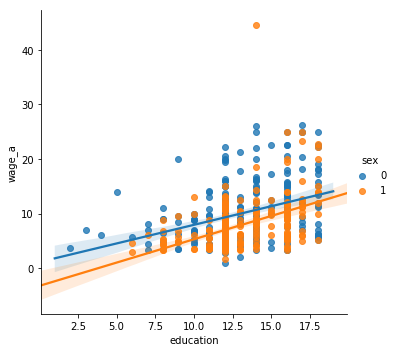

In [12]:
seaborn.lmplot(y='wage_a', x='education',hue='sex' ,data=data)  

In [13]:


import statsmodels.formula.api as sm

In [14]:
result = sm.ols(formula='wage_a ~ education + C(sex)', data=data).fit()

In [15]:
print(result.summary())  

                            OLS Regression Results                            
Dep. Variable:                 wage_a   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     61.62
Date:                Wed, 22 Aug 2018   Prob (F-statistic):           8.63e-25
Time:                        17:30:33   Log-Likelihood:                -1575.6
No. Observations:                 534   AIC:                             3157.
Df Residuals:                     531   BIC:                             3170.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.2178      1.036      0.210      